## Content :
- Neural Network
- Convolutional Neural Networks (CNN)
- Working of CNN


 1. Convolution
 2. ReLu
 3. Pooling 
 4. Fully connected layer


### Neural Network
- Neural networks or artificial neural networks are used in machine learning or deep learning algorithms.
- An artificial neural network (or just neural network) is a software construct that operates similarly to how scientists believe our brains work.

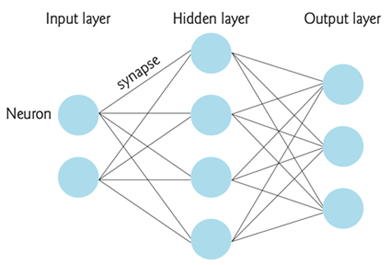

- Our biological nervous systems are controlled via neurons that communicate with one another along pathways called synapses. 
- As we learn, the specific neurons that enable us to perform a given task, like walking, communicate with one another more efficiently. These neurons activate anytime we need to walk. 

### Artificial Neurons
- In a neural network, interconnected artificial neurons simulate the human brain’s neurons to help the network learn. 
- The connections between specific neurons are reinforced during the learning process with the goal of achieving a specific result. 
- In supervised machine learning the aim is to predict the target labels supplied with data samples. 
- It contains huge number of interconnected processing elements called neurons to do all operations. To do this, we’ll train a general neural network model that we can then use to make predictions on unseen data. 

### Example neural network
- The diagram below shows a three-layer neural network. Each circle represents a neuron, and the lines between them simulate the synapses. 
- The output of a neuron becomes the input of another neuron, hence the term neural network. 
- This particular diagram shows a fully connected network, every neuron in a given layer is connected to all the neurons in the next layer

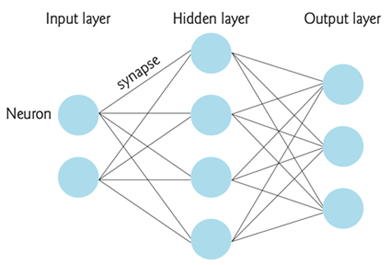

### CNN or Convolutional Neural Networks
- Essentially neural networks that use convolution in the place of general matrix multiplication in at least one of their layers.
- Convolution is a basic operation in which two functions are combined to produce a third function.
- In case of CNN the neuron in a layer will only be connected to a small region of the layer before it, instead of all of the neurons in a fully-connected manner. 
- In this case, we combine an input image with a filter to obtain a feature map.


### Working of a Convolutional Neural Networks
There are four layered concepts to execute Convolutional Neural Networks:
- Convolution
- ReLu
- Pooling 
- Fully Connected Layer

<br>

- CNN in image classification takes images as input after processing and categorizing it under certain categories. Computers view image input as array consisting of pixels and it depends on the image resolution. 
- Depending on the image resolution, we will see h x w x d where h = Height, w = Width, d = Dimensions. Eg, 6 x 6 x 3 RGB matrix image (3 means RGB values) and 4 x 4 x 1(Grayscale image) matrix image matrix. 
- Each input image will pass through a series of convolution layers with filters (Kernals), Pooling, fully integrated layers (FC) and use Softmax function to distinguish an object with a value that may be between 0 and 1.

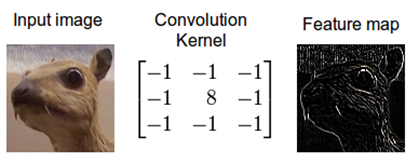


#### The data set that is being used consists of 3 different persons namely : 
1. ayyappa
2. hanuma



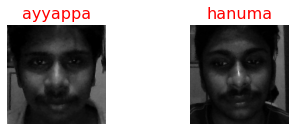

In [2]:
from matplotlib import pyplot as plt
import cv2

#Plot Image
def plotImage(image_location):
    image = cv2.imread(image_name)
    plt.imshow(image)
    plt.axis('off') 

#Plotting an LYMPHOCYTE blood cell image
image_name = r'C:/Users/DELL/Desktop/sem-4/PROJECTS/MIS/data/dataofimages/dataayyappa/ayyappa.1.jpg'
plt.subplot(221)
plt.title('ayyappa',
          fontsize = 16,
          color = 'red')
plotImage(image_name)

#Plotting an MONOCYTE blood cell image
image_name = r'C:/Users/DELL/Desktop/sem-4/PROJECTS/MIS/data/dataofimages/datahanuma/hanuma.1.jpg'
plt.subplot(222)
plt.title('hanuma',
          fontsize = 16,
          color = 'red')
plotImage(image_name)
    


In [3]:
#Imports used for CNN
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from skimage import transform

## Step 1 : Preprocess the image data

- In this step we read the image from the path specified using the cv2 package.
- The image is also resized uniformly to the size 80x80x3. This is done inorder to train the model with the same size of images as different images can have different sizes.
- The class label is also one hot encoded.

The shape of the image is :  (80, 80, 3) 

The image is :


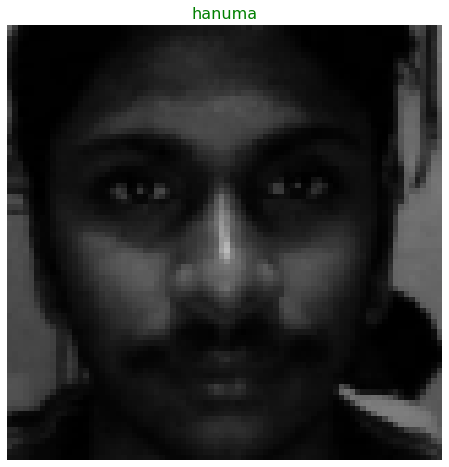

In [12]:
#Reading the input image that will be taken for training
x_train = transform.resize(
          cv2.imread(r'C:/Users/DELL/Desktop/sem-4/PROJECTS/MIS/data/dataofimages/datahanuma/hanuma.900.jpg'), (80, 80, 3));

#Converting into an numpy array for further operations
x_train = np.array(x_train);

#One hot encoding the class label for the input image
y_train = np.array([[1],[0]])

print("The shape of the image is : " , x_train.shape , "\n")
print("The image is :")
fig = plt.subplots(1,figsize=(8,8));
plt.axis('off');
plt.title("hanuma",
          fontsize = 16,
          color = 'green');
plt.imshow(x_train);

# Step - 2 : Convolution layer
## Convolution
- Convolution is the first layer in CNN algorithm where features are extracted from an input image. 
- Convolution preserves the relationship between pixels by learning image features using small squares of input data.
- It is a mathematical operation which takes two inputs where one is image matrix and another is filter.
- The feature map is an element wise multiplication between these two matrices.

<br>

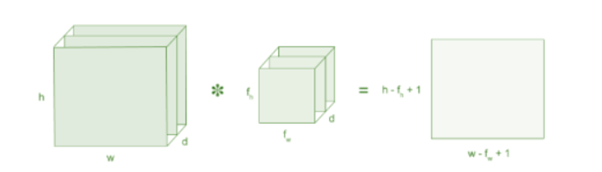


- An image matrix of dimension = (h * w * d)
- A filter = (fh * fw *d)
- Output = (h - fh + 1) *(w – fw + 1) * d


In [13]:
#Convolution operation head
def conv(img, convFilt):
    
    #To check if the number of image channels matches the filter depth.  
    if img.shape[-1] != convFilt.shape[1]:  
        print("Number of channels in both image and filter must match")  
        sys.exit()  
            
    if convFilt.shape[2] != convFilt.shape[3]:
        #To check whether the filer matrix is a square matrix 
        print('The Filter must be a square matrix. I.e. number of rows and columns should be the same')  
        sys.exit()  
        
    #To check if the filter matrix size is odd
    if convFilt.shape[2]%2==0: #Check if filter diemnsions are odd.  
        print('The Filter must have an odd size. I.e. number of rows and columns must be odd')  
        sys.exit() 
        
    #An empty matrix to store the output after convolution
    out_mat = np.zeros((img.shape[0]-convFilt.shape[2]+1,   
                        img.shape[1]-convFilt.shape[2]+1,   
                        convFilt.shape[0]))  
    
    #Convolving the image with each of the filter 
    for filterNum in range(convFilt.shape[0]):
        #print("Filter ", filterNum + 1)  
        
        #Choosing the filter from the available filters
        currentFilt = convFilt[filterNum, :]
        
        #If each filter has multiple channels
        if currentFilt.shape[0] > 2:
            
            #The initial convolution step
            convolutionMap = conv_(img[:, :, 0], currentFilt[0, :, :])
            
            #Convolving each channel with the image and summing the results.
            for ch in range(1, (currentFilt.shape[0])): 
                convolutionMap = convolutionMap + conv_(img[:, :, ch], currentFilt[ch, :, :]) 
                
        #If there is only one channel in the filter   
        else:
            convolutionMap = conv_(img, currentFilt)
        
        #Updating the output matrix at each step
        out_mat[:, :, filterNum] = convolutionMap
        
    return out_mat

- After completing the element wise multiplication between the image and the filter , the sum of all the values is taken and is placed in a new matrix.

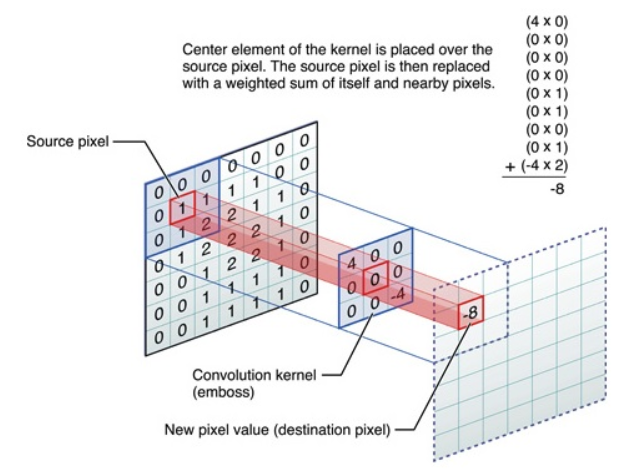

In [14]:
#Main convolution operation
def conv_(img, convFilt):

    filtSize = convFilt.shape[0]  
    
    h = img.shape[0]-filtSize+1;
    w = img.shape[1]-filtSize+1;
    
    #Final result matrix that will store the values of convolved output
    result = np.zeros((h,w))  
    
    #Looping through the image to apply the convolution operation.  
    for r in np.uint16(np.arange(filtSize/2,   
                                 img.shape[0]-(filtSize/2)-2)):  
        
        for c in np.uint16(np.arange(filtSize/2, 
                                     img.shape[1]-filtSize/2-2)):
            
            #Taking the region from the image 
            currWindow = img[r:r+filtSize, c:c+filtSize]  
            
            #Convolution
            #Element-wise multiplication between the current region and the filter.
            #Using * because it is a dot product in python
            convResult = currWindow * convFilt  
            
            #Adding the result after multiplication
            finalSum = np.sum(convResult) 
            
            #Saving the final answer in the result matrix
            result[r, c] = finalSum

    #Removing the outliers from the result matrix
    final_result = result
    
    return final_result 

## ReLU
- ReLU stands for Rectified Linear Unit and it is used as a non-linear operation.
- ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 
- It has become the default activation function for many types of neural networks even for CNN

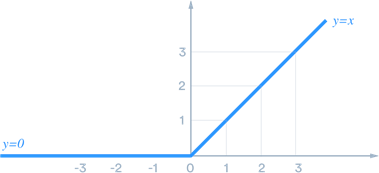

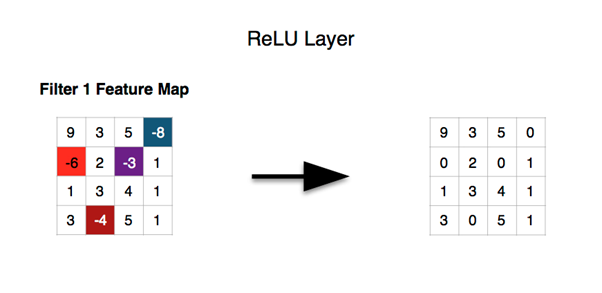

## Filters
- To initialize a filter for the convolution operation , we use a random matrix of dimensions 
<font color = pink> Nf x Nc x Fh x Fw </font>
- Nf indicates the number of filters.
- Nc indicates the number of channels in a filter
- Fh and Fw indicate the kernel size i.e. 3x3 or 5x5. They should always be a square matrix with a odd dimensions.

<br>


## Weights
- Weights are used in the fully connected layer to transform a vector of higher dimension to a vector of lower dimension.
- It uses the basic matrix multiplication method.
- When the dot product of two matrices of size N x m and m x 1 is taken , then the output matrix will have a size N x 1.

In [15]:
#Method to intialize a random filter with standard division as 1
def initializeFilter(size):
    #Using normal distribution to initialize a filter
    scale = 1
    stddev = scale/np.sqrt(np.prod(size))
    return np.random.normal(loc = 0, scale = stddev, size = size)

def initializeWeight(size):
    #Initializing the random weights for the dense function
    return np.random.standard_normal(size=size) * 0.01

# Step 3 - Pooling Layer
## Maxpooling
- It is a Pooling layer that is used to reduce the number of parameters when the images are too large. In this layer we shrink the image stack into a smaller size. They are four stages in pooling layers:


1. Pick a window size (usually 2) 
2. Pick a stride (usually 2)
3. Walk your window across your filtered images
4. From each window, take the maximum value


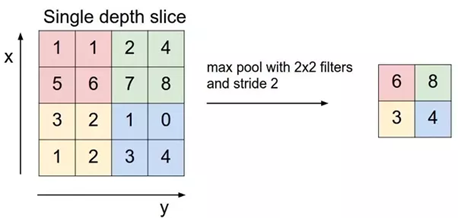

In [16]:
#Maxpool operation
def maxpool(image, f=2, s=2):
    
    #The filter size and stride is set to 2 as default.
    prevH, prevW , channelNum = image.shape
    
    #The output dimension after the maxpool operation
    h = int((prevH - f)/s)+1 
    w = int((prevW - f)/s)+1
    
    #Creating the output matrix that will store the values after maxpooling
    maxpool_out = np.zeros((h, w, channelNum)) 
    
    #Going throught the image with stride s for each channel
    for i in range(channelNum):
        cy = yOut = 0
        
        #Iterating through each column
        while cy + f <= prevW:
            cx = xOut = 0
            
            #Iterating through each row
            while cx + f <= prevH:
                #Selecting the maximum value from the window obtained above
                maxpool_out[xOut,yOut, i] = np.max(image[cx:cx+f ,cy:cy+f, i])
                cx += s
                xOut += 1
                
            cy += s
            yOut += 1
            
    return maxpool_out

# Step 4 - Activation function(Softmax) 
## Softmax
- Softmax is used as the activation function for multi-class classification problems and sometimes can be used in binary class classifcations.
- The function normalizes the outputs, converting them from weighted sum values into probabilities that sum to one. 
- Each value in the output of the softmax function is interpreted as the probability of members
<br>

<div>
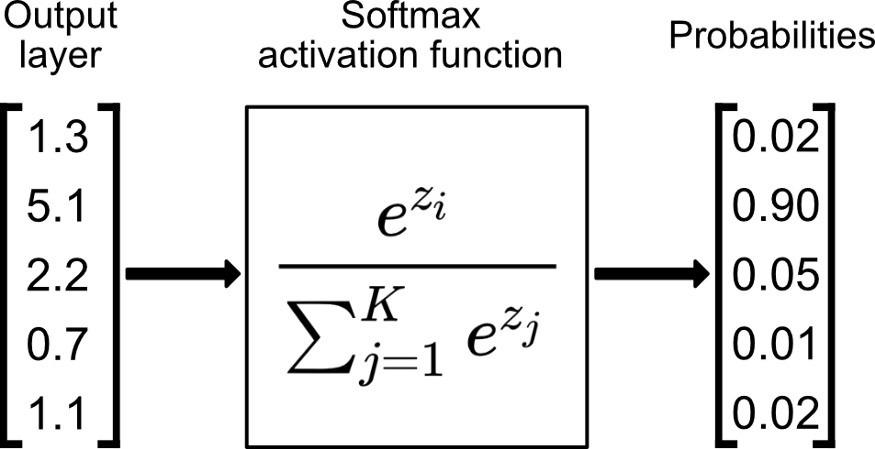
</div>

In [17]:
#Activation function
def softmax(raw_preds):
    
    #Returns a probability value
    out = np.exp(raw_preds)
    return out/np.sum(out)

# Step 5 - Create the CNN model
## The number of layers used is 4 and they are as follows :

The input image is of size 80 x 80 x 3.
1. Layer 1 : Convolution layer with 8 filters of size 3x3x3. The dimensions of the output image would be 78 x 78 x 8. Then the image also goes through the ReLU activation function.
2. Layer 2 : Maxpooling layer with window size 2x2 and stride as 2. The dimensions of the output image will be halved , hence it is 39 x 39 x 8. The number of channels remains the same.
3. Layer 3 : Convolution layer with 16 filters of size 3x3x3. The dimensions of the output image would be 37 x 37 x 16. The ReLU activation function is applied on the image.
4. Layer 4 : Maxpooling layer with window size 2x2 and stride as 2. The dimensions of the output image would be 18 x 18 x 16.

<br>

- After going through all the layers the final image dimensions are 18 x 18 x 16 , which is then converted into a fully connected layer of size 5184 x 1.
- Using a dense layer the vector is converted into a size 2592 x 1 which is later converted into a 2x1 vector.
- The softmax function is applied on this output of size 2x1 and the binary probabilities of a class is returned.

In [25]:
#Size of filters
f1, f2 = (8,3,3,3), (16,8,3,3)

#Model to store each layer
model = [];

#Initializing random filters
f1 = initializeFilter(f1)
f2 = initializeFilter(f2)

print("Shape of the input image : ", x_train.shape)

#Applying the first convolution step
fc = conv(x_train,f1)
fc[fc<=0] = 0
print("Shape after applying first convolution : ",fc.shape)
model.append(fc);

#Applying max pooling operation
fm = maxpool(fc)
print("Shape after applying first maxpooling layer : ",fm.shape)
model.append(fm);

#Applying the second convolution step
sc = conv(fm,f2)
sc[sc<=0] = 0
print("Shape after applying second convolution : ",sc.shape)
model.append(sc);

#Applying max pooling operation
sm = maxpool(sc)
print("Shape after applying second maxpooling layer : ",sm.shape)
model.append(sm);

(h, w, d) = sm.shape

#Flattening the layer to one column of size h*w*d
fcl = sm.reshape(( d * h * w, 1))
print("Shape of fully connected layer : " , fcl.shape)

#Initializing the weight size
w1 = (int(fcl.shape[0]/2),fcl.shape[0])
w2 = (2,int(fcl.shape[0]/2))
w1 = initializeWeight(w1)
w2 = initializeWeight(w2)

#Multiplying weights with the fully connected layer
z = w1.dot(fcl)

#Applying reLU non linearity
z[z<=0] = 0
print("Shape after first dense layer : " , z.shape)

#Multiplying the dense layer with another set of weights
out = w2.dot(z)

#Final output of size 2 , since its a binary classification
print("Shape of the output (2 because binary classification) : ",out.shape)

#Getting the index of the class label after one hot encoding
idx = np.where(y_train==1)

#Softmax
print("Probability of identifying : ", softmax(out)[idx])

Shape of the input image :  (80, 80, 3)
Shape after applying first convolution :  (78, 78, 8)
Shape after applying first maxpooling layer :  (39, 39, 8)
Shape after applying second convolution :  (37, 37, 16)
Shape after applying second maxpooling layer :  (18, 18, 16)
Shape of fully connected layer :  (5184, 1)
Shape after first dense layer :  (2592, 1)
Shape of the output (2 because binary classification) :  (2, 1)
Probability of identifying :  [0.50018255]


# Step 6 - Visualize an input image in each activation layer.

The image is taken after going through each activation layer and is normalized in order to avoid a black image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image that is being trained : 


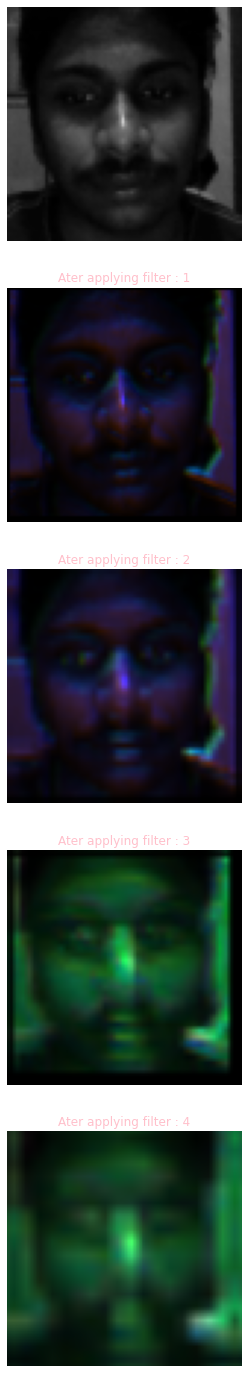

In [26]:
fig, axs = plt.subplots(len(model)+1,figsize=(25,25));
print("The image that is being trained : ")
axs[0].imshow(transform.resize(x_train, (80, 80, 3)));
axs[0].axis('off')
count = 1;
for layer in model:
    layer = transform.resize(layer, (80, 80, 3));
    layer_norm = np.zeros((80,80,3));
    final_img = cv2.normalize(layer,layer_norm,0, 1, cv2.NORM_MINMAX);
    axs[count].axis('off');
    axs[count].set_title('Ater applying filter : ' + str(count) , color="pink");
    axs[count].imshow(final_img);
    count = count+1;